In [104]:
import numpy as np                          #for numerical operations  
import matplotlib.pyplot as plt             #for data visualisation
from sklearn.linear_model import Lasso       #import lasso from  scikit learn

# setting matplotlib plotting parameters
plt.rcdefaults()
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['font.size'] = 12
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['legend.fontsize'] = 10
plt.rc('font', family='serif')

In [105]:
sample_size = 100                                        #define sample size
degree_poly = 2                                          #Order of poly = 2  
#generate data for qudratic function
x = 6 * np.random.rand(sample_size, 1) - 3
y = 0.5 * x**2 + x + 2 +np.random.randn(sample_size, 1)
x_b = np.c_[np.ones((sample_size, 1)), x, x**2]          #add bias x0 = 1

In [106]:
def fit_and_plot(alpha, n_iteration):
    theta = np.random.rand(x_b.shape[1],1)                                                  #Initialize the random theta value
    eta = 0.005                                                                            # learning rate eta is 0.005
    for i in range(n_iteration):
        subgradient = 2/sample_size * (x_b.T).dot(x_b.dot(theta)- y) + alpha * np.sign(theta)  # calculate gradient and add regularization param
        theta -= eta * subgradient                                                             # calculate next theta
        y_predict = x_b.dot(theta)
        if i % 2500 == 0:                                                                   # predict value using new theta
            plt.scatter(x, y_predict, label=f"epoch :{i}")
            plt.xlabel('x-axis')                               
            plt.ylabel('y-axis')                               
            plt.title(r"$\alpha = $" +f'{alpha}')                                            #define plot title        
    plt.scatter(x, y, label = 'Dataset', marker='+', c = 'black')       
    plt.legend()                               
    print(f"Regularized term: {alpha} | Final epoch theta: {theta[0], theta[1], theta[2]}")
    

Regularized term: 0 | Final epoch theta: (array([2.0977451]), array([0.99120602]), array([0.52509843]))
Regularized term: 0.001 | Final epoch theta: (array([2.09684204]), array([0.9910383]), array([0.52524153]))
Regularized term: 0.1 | Final epoch theta: (array([2.00743877]), array([0.97443474]), array([0.53940839]))
Regularized term: 1 | Final epoch theta: (array([1.1946818]), array([0.82349324]), array([0.66819802]))


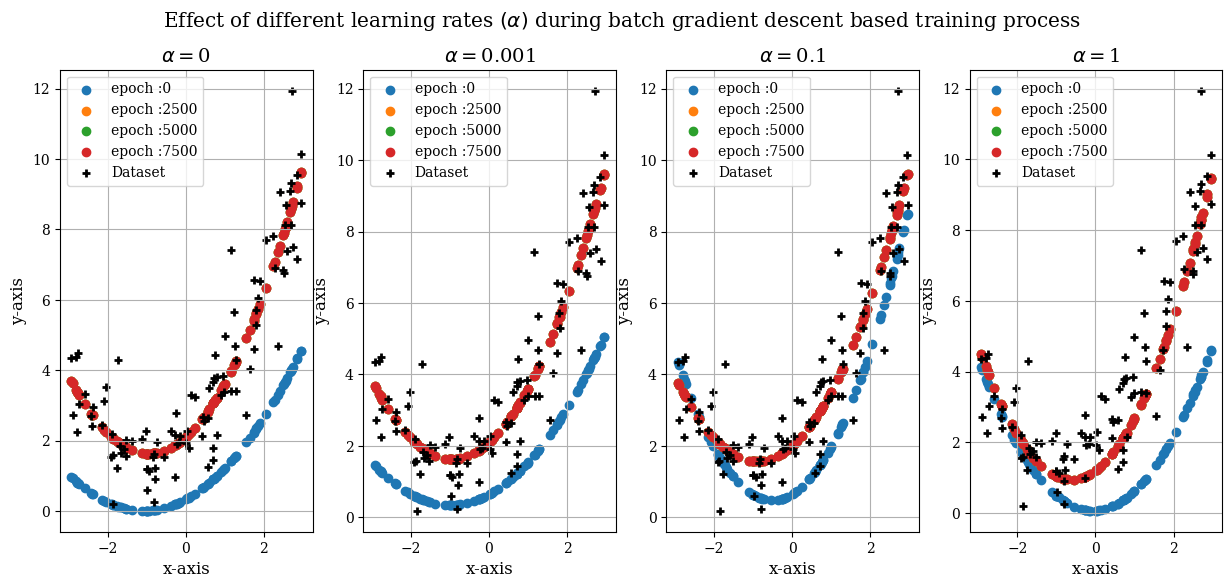

In [107]:
plt.figure(figsize=[15,6])              #define figure size
alpha_list = [0, 0.001, 0.1, 1]         #list of different regularized parameter alpha

for i in range(1, 5):                   
    plt.subplot(1, 4, i)
    fit_and_plot(alpha_list[i-1],10000)
    plt.grid()
    plt.suptitle(r"Effect of different learning rates $(\alpha)$ during batch gradient descent based training process")

In [114]:
model = Lasso(alpha = 0.001)
model.fit(x_b, y)
y_pred = model.predict(x_b)
print('Model intercept: ',model.intercept_, '\n','Model Coefficient: ',model.coef_)

Model intercept:  [2.09811439] 
 Model Coefficient:  [0.         0.99089269 0.52499364]
